In [1]:
import sys
import os
sys.path.append(os.path.abspath('..'))

import matplotlib.pyplot as plt
import torch
from torch.utils.data import TensorDataset, DataLoader
torch.set_default_device('cpu')

import numpy as np

from transformers_simple.transformer import GPT
from transformers_simple.train import Trainer
from transformers_simple.dataset import CharDataset

In [2]:
N = 4
block_size  = 2
embed_size  = 6
hidden_size = 60
attn_hidden_size = 60
output_size = 3
num_heads   = 3
vocab_size  = 3
num_transformer_blocks = 3

log_interval = 10
epochs = 5
learning_rate = 5e-4
device = torch.device('cpu')

In [3]:
# #block size 1
# data = "".join(["abca"]*1000)

In [4]:
# block size 2
data = "".join(["aabcacb"]*1000)

In [5]:
dataset = CharDataset(data=data, block_size=block_size)
dataset[0]

(tensor([0, 0]), tensor([0, 1]))

In [6]:
net = GPT(vocab_size=vocab_size, 
          block_size=block_size,
          embed_size=embed_size,
          hidden_size=hidden_size,
          attn_hidden_size=attn_hidden_size,
          output_size=output_size,
          num_transformer_blocks=num_transformer_blocks,
          num_heads=num_heads,
         attn_dropout=0.0,
          attn_block_dropout=0.0,
         attn_residual_dropout=0.0,
         embed_dropout=0.0)

In [7]:
x = dataset[0][0].view(1,-1)

In [8]:
x

tensor([[0, 0]])

In [9]:
loss = torch.nn.CrossEntropyLoss()

def loss_fn(o,y):
    #return loss(o.view(-1,vocab_size),y.view(-1))

    return loss(o[:,-1],y[:,-1])

In [10]:
trainer = Trainer(model=net, 
                  dataset=dataset, 
                  loss_fn=loss_fn, 
                  batch_size=N, 
                  learning_rate=learning_rate,
                  epochs=epochs, 
                  log_interval=log_interval, 
                  device=device)

In [11]:
trainer.run()

Train Epoch: 0 [0/6998 (0%)]	Loss: 1.189176
Train Epoch: 0 [40/6998 (1%)]	Loss: 0.976420
Train Epoch: 0 [80/6998 (1%)]	Loss: 1.045748
Train Epoch: 0 [120/6998 (2%)]	Loss: 0.921905
Train Epoch: 0 [160/6998 (2%)]	Loss: 0.886868
Train Epoch: 0 [200/6998 (3%)]	Loss: 0.874031
Train Epoch: 0 [240/6998 (3%)]	Loss: 0.970049
Train Epoch: 0 [280/6998 (4%)]	Loss: 0.616838
Train Epoch: 0 [320/6998 (5%)]	Loss: 0.573697
Train Epoch: 0 [360/6998 (5%)]	Loss: 0.478130
Train Epoch: 0 [400/6998 (6%)]	Loss: 0.412671
Train Epoch: 0 [440/6998 (6%)]	Loss: 0.484299
Train Epoch: 0 [480/6998 (7%)]	Loss: 0.367179
Train Epoch: 0 [520/6998 (7%)]	Loss: 0.392611
Train Epoch: 0 [560/6998 (8%)]	Loss: 0.385392
Train Epoch: 0 [600/6998 (9%)]	Loss: 0.275822
Train Epoch: 0 [640/6998 (9%)]	Loss: 0.315542
Train Epoch: 0 [680/6998 (10%)]	Loss: 0.261511
Train Epoch: 0 [720/6998 (10%)]	Loss: 0.326484
Train Epoch: 0 [760/6998 (11%)]	Loss: 0.283989
Train Epoch: 0 [800/6998 (11%)]	Loss: 0.285411
Train Epoch: 0 [840/6998 (12%)]	Lo

Train Epoch: 0 [6880/6998 (98%)]	Loss: 0.012065
Train Epoch: 0 [6920/6998 (99%)]	Loss: 0.015886
Train Epoch: 0 [6960/6998 (99%)]	Loss: 0.011759
Train Epoch: 1 [0/6998 (0%)]	Loss: 0.009381
Train Epoch: 1 [40/6998 (1%)]	Loss: 0.011474
Train Epoch: 1 [80/6998 (1%)]	Loss: 0.009144
Train Epoch: 1 [120/6998 (2%)]	Loss: 0.012783
Train Epoch: 1 [160/6998 (2%)]	Loss: 0.014765
Train Epoch: 1 [200/6998 (3%)]	Loss: 0.011500
Train Epoch: 1 [240/6998 (3%)]	Loss: 0.010248
Train Epoch: 1 [280/6998 (4%)]	Loss: 0.014819
Train Epoch: 1 [320/6998 (5%)]	Loss: 0.011562
Train Epoch: 1 [360/6998 (5%)]	Loss: 0.010426
Train Epoch: 1 [400/6998 (6%)]	Loss: 0.012802
Train Epoch: 1 [440/6998 (6%)]	Loss: 0.008217
Train Epoch: 1 [480/6998 (7%)]	Loss: 0.010061
Train Epoch: 1 [520/6998 (7%)]	Loss: 0.012817
Train Epoch: 1 [560/6998 (8%)]	Loss: 0.008412
Train Epoch: 1 [600/6998 (9%)]	Loss: 0.011609
Train Epoch: 1 [640/6998 (9%)]	Loss: 0.009610
Train Epoch: 1 [680/6998 (10%)]	Loss: 0.010878
Train Epoch: 1 [720/6998 (10%)]

Train Epoch: 1 [6760/6998 (97%)]	Loss: 0.002564
Train Epoch: 1 [6800/6998 (97%)]	Loss: 0.002422
Train Epoch: 1 [6840/6998 (98%)]	Loss: 0.002643
Train Epoch: 1 [6880/6998 (98%)]	Loss: 0.002904
Train Epoch: 1 [6920/6998 (99%)]	Loss: 0.002077
Train Epoch: 1 [6960/6998 (99%)]	Loss: 0.002184
Train Epoch: 2 [0/6998 (0%)]	Loss: 0.002564
Train Epoch: 2 [40/6998 (1%)]	Loss: 0.002543
Train Epoch: 2 [80/6998 (1%)]	Loss: 0.001865
Train Epoch: 2 [120/6998 (2%)]	Loss: 0.001995
Train Epoch: 2 [160/6998 (2%)]	Loss: 0.002365
Train Epoch: 2 [200/6998 (3%)]	Loss: 0.002612
Train Epoch: 2 [240/6998 (3%)]	Loss: 0.001688
Train Epoch: 2 [280/6998 (4%)]	Loss: 0.001793
Train Epoch: 2 [320/6998 (5%)]	Loss: 0.002527
Train Epoch: 2 [360/6998 (5%)]	Loss: 0.001764
Train Epoch: 2 [400/6998 (6%)]	Loss: 0.002378
Train Epoch: 2 [440/6998 (6%)]	Loss: 0.001369
Train Epoch: 2 [480/6998 (7%)]	Loss: 0.002088
Train Epoch: 2 [520/6998 (7%)]	Loss: 0.002467
Train Epoch: 2 [560/6998 (8%)]	Loss: 0.002199
Train Epoch: 2 [600/6998 (

Train Epoch: 2 [6680/6998 (95%)]	Loss: 0.000548
Train Epoch: 2 [6720/6998 (96%)]	Loss: 0.000662
Train Epoch: 2 [6760/6998 (97%)]	Loss: 0.000738
Train Epoch: 2 [6800/6998 (97%)]	Loss: 0.000690
Train Epoch: 2 [6840/6998 (98%)]	Loss: 0.000649
Train Epoch: 2 [6880/6998 (98%)]	Loss: 0.000724
Train Epoch: 2 [6920/6998 (99%)]	Loss: 0.000641
Train Epoch: 2 [6960/6998 (99%)]	Loss: 0.000864
Train Epoch: 3 [0/6998 (0%)]	Loss: 0.000598
Train Epoch: 3 [40/6998 (1%)]	Loss: 0.000629
Train Epoch: 3 [80/6998 (1%)]	Loss: 0.000701
Train Epoch: 3 [120/6998 (2%)]	Loss: 0.000656
Train Epoch: 3 [160/6998 (2%)]	Loss: 0.000726
Train Epoch: 3 [200/6998 (3%)]	Loss: 0.000687
Train Epoch: 3 [240/6998 (3%)]	Loss: 0.000683
Train Epoch: 3 [280/6998 (4%)]	Loss: 0.000571
Train Epoch: 3 [320/6998 (5%)]	Loss: 0.000494
Train Epoch: 3 [360/6998 (5%)]	Loss: 0.000743
Train Epoch: 3 [400/6998 (6%)]	Loss: 0.000594
Train Epoch: 3 [440/6998 (6%)]	Loss: 0.000801
Train Epoch: 3 [480/6998 (7%)]	Loss: 0.000515
Train Epoch: 3 [520/69

Train Epoch: 3 [6600/6998 (94%)]	Loss: 0.000270
Train Epoch: 3 [6640/6998 (95%)]	Loss: 0.000201
Train Epoch: 3 [6680/6998 (95%)]	Loss: 0.000267
Train Epoch: 3 [6720/6998 (96%)]	Loss: 0.000183
Train Epoch: 3 [6760/6998 (97%)]	Loss: 0.000223
Train Epoch: 3 [6800/6998 (97%)]	Loss: 0.000273
Train Epoch: 3 [6840/6998 (98%)]	Loss: 0.000260
Train Epoch: 3 [6880/6998 (98%)]	Loss: 0.000219
Train Epoch: 3 [6920/6998 (99%)]	Loss: 0.000282
Train Epoch: 3 [6960/6998 (99%)]	Loss: 0.000191
Train Epoch: 4 [0/6998 (0%)]	Loss: 0.000215
Train Epoch: 4 [40/6998 (1%)]	Loss: 0.000228
Train Epoch: 4 [80/6998 (1%)]	Loss: 0.000188
Train Epoch: 4 [120/6998 (2%)]	Loss: 0.000274
Train Epoch: 4 [160/6998 (2%)]	Loss: 0.000244
Train Epoch: 4 [200/6998 (3%)]	Loss: 0.000232
Train Epoch: 4 [240/6998 (3%)]	Loss: 0.000207
Train Epoch: 4 [280/6998 (4%)]	Loss: 0.000206
Train Epoch: 4 [320/6998 (5%)]	Loss: 0.000144
Train Epoch: 4 [360/6998 (5%)]	Loss: 0.000190
Train Epoch: 4 [400/6998 (6%)]	Loss: 0.000239
Train Epoch: 4 [44

Train Epoch: 4 [6560/6998 (94%)]	Loss: 0.000083
Train Epoch: 4 [6600/6998 (94%)]	Loss: 0.000058
Train Epoch: 4 [6640/6998 (95%)]	Loss: 0.000077
Train Epoch: 4 [6680/6998 (95%)]	Loss: 0.000067
Train Epoch: 4 [6720/6998 (96%)]	Loss: 0.000086
Train Epoch: 4 [6760/6998 (97%)]	Loss: 0.000099
Train Epoch: 4 [6800/6998 (97%)]	Loss: 0.000104
Train Epoch: 4 [6840/6998 (98%)]	Loss: 0.000089
Train Epoch: 4 [6880/6998 (98%)]	Loss: 0.000083
Train Epoch: 4 [6920/6998 (99%)]	Loss: 0.000055
Train Epoch: 4 [6960/6998 (99%)]	Loss: 0.000087


In [12]:
x = dataset[1][0].view(1,-1)

o = net(x)

In [13]:
torch.nn.functional.softmax(o[0], dim=1)

tensor([[3.7284e-05, 9.9991e-01, 5.3368e-05],
        [5.1058e-05, 5.9164e-05, 9.9989e-01]], grad_fn=<SoftmaxBackward0>)

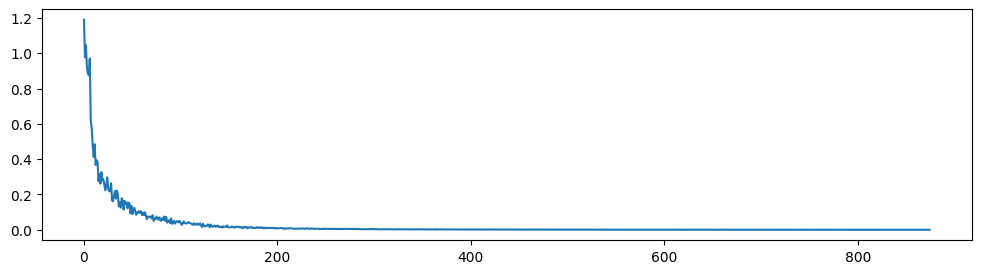

In [14]:
loss_history = trainer.loss_history

plt.figure(figsize=(12,3))
plt.plot(loss_history)
plt.show()